Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
None

Missing Values:
 case_id                  0
continent                0
education_

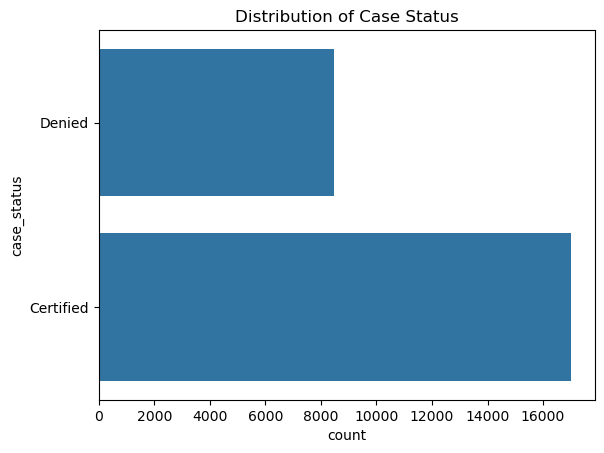

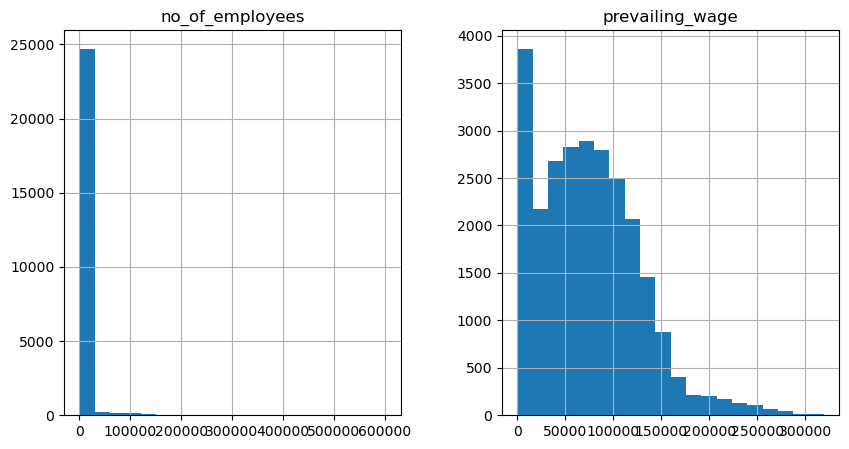

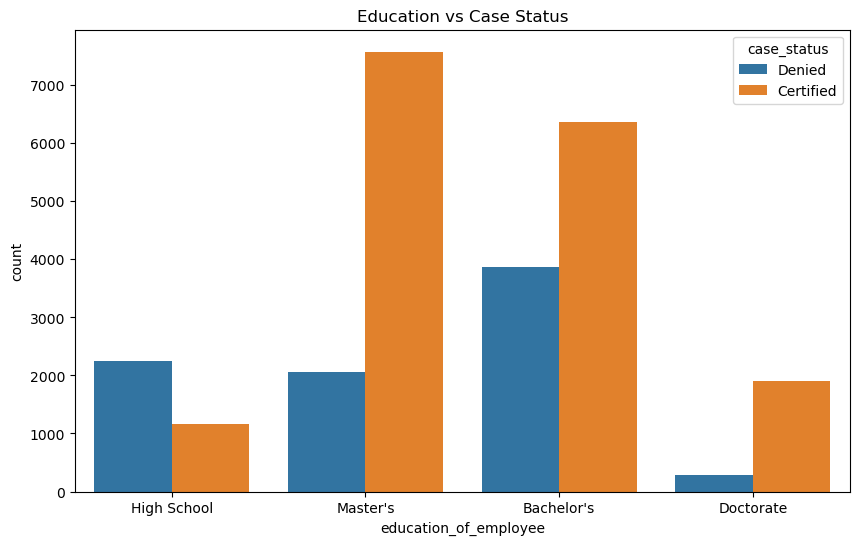

DecisionTree Model - Accuracy: 0.6664
ROC AUC: 0.6234
--------------------------------------------------
RandomForest Model - Accuracy: 0.7316
ROC AUC: 0.7599
--------------------------------------------------
GradientBoosting Model - Accuracy: 0.7523
ROC AUC: 0.7865
--------------------------------------------------
Bagging Model - Accuracy: 0.7010
ROC AUC: 0.7297
--------------------------------------------------
DecisionTree (Oversampled Data) - Accuracy: 0.6344
ROC AUC: 0.6151
--------------------------------------------------
RandomForest (Oversampled Data) - Accuracy: 0.7077
ROC AUC: 0.7411
--------------------------------------------------
GradientBoosting (Oversampled Data) - Accuracy: 0.7183
ROC AUC: 0.7519
--------------------------------------------------
Bagging (Oversampled Data) - Accuracy: 0.6644
ROC AUC: 0.7117
--------------------------------------------------
DecisionTree (Undersampled Data) - Accuracy: 0.6228
ROC AUC: 0.6225
------------------------------------------

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "C:/Users/ARPIT SING/Documents/EasyVisa.csv"  # Update with your file's location
data = pd.read_csv(file_path)

# 1. Exploratory Data Analysis
print("Dataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

# Visualizing target variable
sns.countplot(data['case_status'])
plt.title("Distribution of Case Status")
plt.show()

# Visualizing numeric variables
numeric_columns = ['no_of_employees', 'prevailing_wage']
data[numeric_columns].hist(bins=20, figsize=(10, 5))
plt.show()

# Bivariate Analysis (for categorical vs target variable)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education_of_employee', hue='case_status')
plt.title('Education vs Case Status')
plt.show()

# 2. Data Cleaning and Preprocessing
# Remove outliers and handle inconsistencies
data = data[data['no_of_employees'] >= 0]  # Remove negative values
data['case_status'] = data['case_status'].str.lower()
data['case_status'] = data['case_status'].map({'certified': 1, 'denied': 0})

# Encoding categorical variables
categorical_columns = ['continent', 'education_of_employee', 'has_job_experience', 
                       'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting features and target variable
X = data.drop(columns=['case_status', 'case_id'])
y = data['case_status']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Model Building - Original Data
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Model - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.4f}")
    print("-" * 50)

# 4. Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    print(f"{name} (Oversampled Data) - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.4f}")
    print("-" * 50)

# 5. Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

for name, model in models.items():
    model.fit(X_train_rus, y_train_rus)
    y_pred = model.predict(X_test)
    print(f"{name} (Undersampled Data) - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.4f}")
    print("-" * 50)

# 6. Hyperparameter Tuning
tuned_models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
}

param_grid = {
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]},
    'GradientBoosting': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]},
    'Bagging': {'n_estimators': [10, 50], 'max_samples': [0.5, 1.0]}
}

for name, model in tuned_models.items():
    grid = GridSearchCV(model, param_grid[name], cv=3, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best Parameters for {name}: {grid.best_params_}")
    print(f"Best ROC AUC: {grid.best_score_:.4f}")
    print("-" * 50)

# 7. Actionable Insights and Recommendations
print("Insights and Recommendations:")
print("1. Features like 'prevailing_wage', 'education_of_employee', and 'continent' significantly affect visa approval chances.")
print("2. Employers should ensure competitive wages to improve visa approval rates.")
print("3. Implementing better hiring strategies may minimize the need for visa denials.")
